In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('data/drug_consumption.csv')

In [33]:
feature_columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
drug_columns = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
                'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
                'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']


In [ ]:
def train_evaluate_models(X, y, drug_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'SVM': SVC(),
        'Perceptron': Perceptron()
    }
    
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        
        print(f"\n{drug_name} - {name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
    
    return results



In [24]:
all_results = {}

X = df[feature_columns]
for drug in drug_columns:
    print(f"\n{'='*50}")
    print(f"Predicting {drug} usage")
    print('='*50)
    
    y = df[drug]
    results = train_evaluate_models(X, y, drug)
    all_results[drug] = results

best_models = {}
for drug in drug_columns:
    best_model = max(all_results[drug].items(), key=lambda x: x[1])
    best_models[drug] = best_model

print("\n\nBest Models for Each Drug:")
print('='*50)
for drug, (model, accuracy) in best_models.items():
    print(f"{drug}: {model} (Accuracy: {accuracy:.4f})")


results_df = pd.DataFrame(all_results)



Predicting Alcohol usage

Alcohol - Logistic Regression Results:
Accuracy: 0.3926

Classification Report:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         7
         CL1       0.00      0.00      0.00         7
         CL2       0.00      0.00      0.00        16
         CL3       0.13      0.06      0.08        34
         CL4       0.33      0.01      0.03        68
         CL5       0.42      0.83      0.55       153
         CL6       0.33      0.20      0.25        92

    accuracy                           0.39       377
   macro avg       0.17      0.16      0.13       377
weighted avg       0.32      0.39      0.30       377


Alcohol - Decision Tree Results:
Accuracy: 0.2891

Classification Report:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         7
         CL1       0.00      0.00      0.00         7
         CL2       0.00      0.00      0.00        16
    

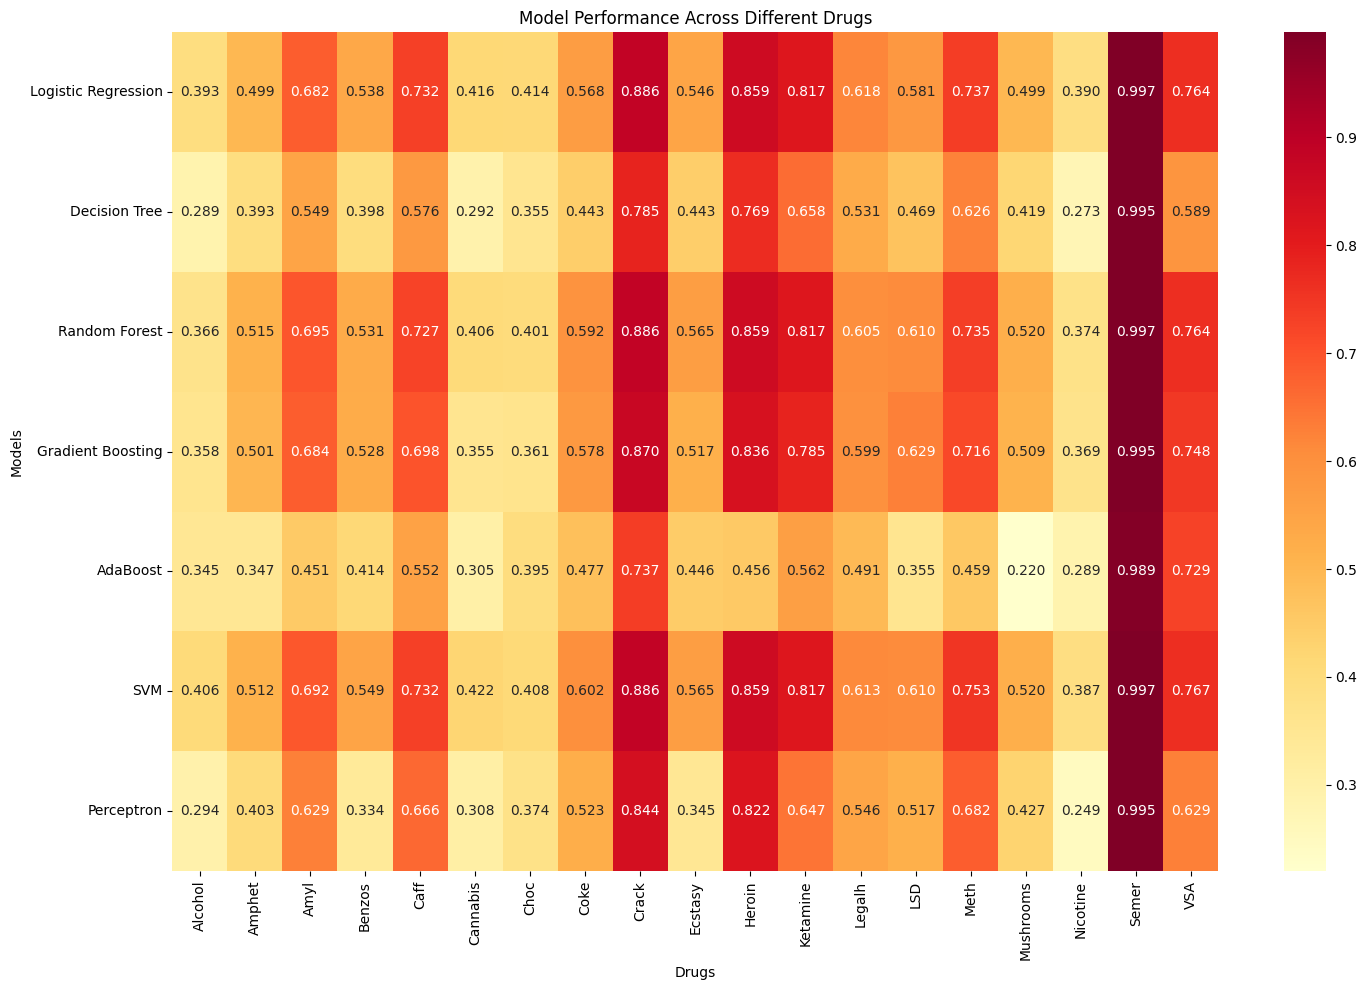

In [26]:

plt.figure(figsize=(15, 10))
sns.heatmap(results_df, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Model Performance Across Different Drugs')
plt.ylabel('Models')
plt.xlabel('Drugs')
plt.tight_layout()
plt.show()

In [ ]:

param_distributions = {
    'Logistic Regression': {
        'C': uniform(0.1, 10),
        'max_iter': [1000],
        'solver': ['lbfgs', 'liblinear', 'sag'],
        'class_weight': ['balanced', None]
    },
    'Decision Tree': {
        'max_depth': randint(3, 20),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': randint(100, 500),
        'max_depth': randint(3, 20),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10)
    },
    'Gradient Boosting': {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': randint(3, 10),
        'min_samples_split': randint(2, 20)
    },
    'AdaBoost': {
        'n_estimators': randint(50, 300),
        'learning_rate': uniform(0.01, 1)
    },
    'SVM': {
        'C': uniform(0.1, 10),
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    },
    'Perceptron': {
        'max_iter': randint(500, 2000),
        'eta0': uniform(0.1, 1.0),
        'penalty': [None, 'l2', 'l1'],
        'alpha': uniform(0.0001, 0.01)
    }
}

In [ ]:
def train_evaluate_models(X, y, drug_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'SVM': SVC(),
        'Perceptron': Perceptron()
    }
    
    results = {}
    best_params = {}
    
    for name, model in models.items():
        print(f"\nTraining {name} for {drug_name}")
        
        random_search = RandomizedSearchCV(
            model,
            param_distributions[name],
            n_iter=15,
            cv=5,
            n_jobs=-1,
            random_state=42,
            verbose=1
        )
        
        random_search.fit(X_train, y_train)
        
        best_model = random_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        results[name] = accuracy
        best_params[name] = random_search.best_params_
        
        print(f"Best parameters: {random_search.best_params_}")
        print(f"Best accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
    
    return results, best_params



Predicting Alcohol usage

Training Logistic Regression for Alcohol
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 6.274815096277165, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}
Best accuracy: 0.3952

Classification Report:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         7
         CL1       0.00      0.00      0.00         7
         CL2       0.00      0.00      0.00        16
         CL3       0.17      0.06      0.09        34
         CL4       0.33      0.01      0.03        68
         CL5       0.42      0.84      0.56       153
         CL6       0.33      0.18      0.24        92

    accuracy                           0.40       377
   macro avg       0.18      0.16      0.13       377
weighted avg       0.32      0.40      0.30       377


Training Decision Tree for Alcohol
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'criteri

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.010778765841014329, 'n_estimators': 237}
Best accuracy: 0.4058

Classification Report:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         7
         CL1       0.00      0.00      0.00         7
         CL2       0.00      0.00      0.00        16
         CL3       0.00      0.00      0.00        34
         CL4       0.00      0.00      0.00        68
         CL5       0.41      1.00      0.58       153
         CL6       0.00      0.00      0.00        92

    accuracy                           0.41       377
   macro avg       0.06      0.14      0.08       377
weighted avg       0.16      0.41      0.23       377


Training SVM for Alcohol
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 0.6808361216819946, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy: 0.3979

Classification Report:
              precision    recall  f1-score   support

         CL0  

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.010778765841014329, 'n_estimators': 237}
Best accuracy: 0.5199

Classification Report:
              precision    recall  f1-score   support

         CL0       0.52      1.00      0.68       196
         CL1       0.00      0.00      0.00        53
         CL2       0.00      0.00      0.00        46
         CL3       0.00      0.00      0.00        42
         CL4       0.00      0.00      0.00        13
         CL5       0.00      0.00      0.00        11
         CL6       0.00      0.00      0.00        16

    accuracy                           0.52       377
   macro avg       0.07      0.14      0.10       377
weighted avg       0.27      0.52      0.36       377


Training SVM for Amphet
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 0.30584494295802445, 'gamma': 'auto', 'kernel': 'linear'}
Best accuracy: 0.5199

Classification Report:
              precision    recall  f1-score   support

         CL

/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: Con

Best parameters: {'C': 0.30584494295802445, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}
Best accuracy: 0.6923

Classification Report:
              precision    recall  f1-score   support

         CL0       0.71      0.98      0.82       261
         CL1       0.40      0.04      0.08        45
         CL2       0.30      0.07      0.11        44
         CL3       0.00      0.00      0.00        20
         CL4       0.00      0.00      0.00         6
         CL5       0.00      0.00      0.00         1

    accuracy                           0.69       377
   macro avg       0.23      0.18      0.17       377
weighted avg       0.57      0.69      0.59       377


Training Decision Tree for Amyl
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 16}
Best accuracy: 0.6950

Classification Report:
              precision    recall  f1-score   support

   

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.010778765841014329, 'n_estimators': 237}
Best accuracy: 0.6923

Classification Report:
              precision    recall  f1-score   support

         CL0       0.69      1.00      0.82       261
         CL1       0.00      0.00      0.00        45
         CL2       0.00      0.00      0.00        44
         CL3       0.00      0.00      0.00        20
         CL4       0.00      0.00      0.00         6
         CL5       0.00      0.00      0.00         1

    accuracy                           0.69       377
   macro avg       0.12      0.17      0.14       377
weighted avg       0.48      0.69      0.57       377


Training SVM for Amyl
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 0.6808361216819946, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy: 0.6923

Classification Report:
              precision    recall  f1-score   support

         CL0       0.69      1.00      0.82       261
         CL1     

/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: Con

Best parameters: {'C': 0.30584494295802445, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}
Best accuracy: 0.5385

Classification Report:
              precision    recall  f1-score   support

         CL0       0.58      0.95      0.72       203
         CL1       0.14      0.05      0.07        21
         CL2       0.50      0.03      0.05        38
         CL3       0.26      0.16      0.20        51
         CL4       0.00      0.00      0.00        27
         CL5       0.00      0.00      0.00        15
         CL6       0.00      0.00      0.00        22

    accuracy                           0.54       377
   macro avg       0.21      0.17      0.15       377
weighted avg       0.41      0.54      0.43       377


Training Decision Tree for Benzos
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 16}
Best accuracy: 0.5438

Classification Report:
  

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.010778765841014329, 'n_estimators': 237}
Best accuracy: 0.5385

Classification Report:
              precision    recall  f1-score   support

         CL0       0.54      1.00      0.70       203
         CL1       0.00      0.00      0.00        21
         CL2       0.00      0.00      0.00        38
         CL3       0.00      0.00      0.00        51
         CL4       0.00      0.00      0.00        27
         CL5       0.00      0.00      0.00        15
         CL6       0.00      0.00      0.00        22

    accuracy                           0.54       377
   macro avg       0.08      0.14      0.10       377
weighted avg       0.29      0.54      0.38       377


Training SVM for Benzos
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 0.30584494295802445, 'gamma': 'auto', 'kernel': 'linear'}
Best accuracy: 0.5385

Classification Report:
              precision    recall  f1-score   support

         CL

/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: Con

Best parameters: {'C': 0.30584494295802445, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}
Best accuracy: 0.7321

Classification Report:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         5
         CL1       0.00      0.00      0.00         3
         CL2       0.00      0.00      0.00         7
         CL3       0.00      0.00      0.00        13
         CL4       0.00      0.00      0.00        21
         CL5       0.00      0.00      0.00        52
         CL6       0.73      1.00      0.85       276

    accuracy                           0.73       377
   macro avg       0.10      0.14      0.12       377
weighted avg       0.54      0.73      0.62       377


Training Decision Tree for Caff
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 13}
Best accuracy: 0.7268

Classification Report:
    

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.06808361216819946, 'n_estimators': 137}
Best accuracy: 0.7321

Classification Report:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         5
         CL1       0.00      0.00      0.00         3
         CL2       0.00      0.00      0.00         7
         CL3       0.00      0.00      0.00        13
         CL4       0.00      0.00      0.00        21
         CL5       0.00      0.00      0.00        52
         CL6       0.73      1.00      0.85       276

    accuracy                           0.73       377
   macro avg       0.10      0.14      0.12       377
weighted avg       0.54      0.73      0.62       377


Training SVM for Caff
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 1.6601864044243653, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy: 0.7321

Classification Report:
              precision    recall  f1-score   support

         CL0     

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.1934347898661638, 'n_estimators': 121}
Best accuracy: 0.3873

Classification Report:
              precision    recall  f1-score   support

         CL0       0.45      0.58      0.51        86
         CL1       0.17      0.29      0.22        28
         CL2       0.21      0.16      0.19        55
         CL3       0.40      0.07      0.12        57
         CL4       0.00      0.00      0.00        27
         CL5       0.00      0.00      0.00        32
         CL6       0.45      0.82      0.58        92

    accuracy                           0.39       377
   macro avg       0.24      0.27      0.23       377
weighted avg       0.32      0.39      0.32       377


Training SVM for Cannabis
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 8.424426408004217, 'gamma': 'auto', 'kernel': 'linear'}
Best accuracy: 0.4191

Classification Report:
              precision    recall  f1-score   support

         CL0 

/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: Con

Best parameters: {'C': 6.274815096277165, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}
Best accuracy: 0.4111

Classification Report:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         4
         CL2       0.00      0.00      0.00         3
         CL3       0.00      0.00      0.00         9
         CL4       0.00      0.00      0.00        52
         CL5       0.38      0.19      0.25       156
         CL6       0.42      0.82      0.56       153

    accuracy                           0.41       377
   macro avg       0.13      0.17      0.13       377
weighted avg       0.33      0.41      0.33       377


Training Decision Tree for Choc
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 16}
Best accuracy: 0.4058

Classification Report:
              precision    recall  f1-score   support

     

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.010778765841014329, 'n_estimators': 237}
Best accuracy: 0.4111

Classification Report:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         4
         CL2       0.00      0.00      0.00         3
         CL3       0.00      0.00      0.00         9
         CL4       0.00      0.00      0.00        52
         CL5       0.42      0.06      0.11       156
         CL6       0.41      0.95      0.57       153

    accuracy                           0.41       377
   macro avg       0.14      0.17      0.11       377
weighted avg       0.34      0.41      0.28       377


Training SVM for Choc
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 0.6808361216819946, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy: 0.4111

Classification Report:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         4
         CL2     

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.03306242504141576, 'n_estimators': 268}
Best accuracy: 0.5809

Classification Report:
              precision    recall  f1-score   support

         CL0       0.61      0.96      0.74       224
         CL1       0.00      0.00      0.00        30
         CL2       0.00      0.00      0.00        44
         CL3       0.20      0.12      0.15        43
         CL4       0.00      0.00      0.00        25
         CL5       0.00      0.00      0.00         8
         CL6       0.00      0.00      0.00         3

    accuracy                           0.58       377
   macro avg       0.12      0.15      0.13       377
weighted avg       0.38      0.58      0.46       377


Training SVM for Coke
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 1.6601864044243653, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy: 0.5915

Classification Report:
              precision    recall  f1-score   support

         CL0     

/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: Con

Best parameters: {'C': 0.30584494295802445, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}
Best accuracy: 0.8859

Classification Report:
              precision    recall  f1-score   support

         CL0       0.89      1.00      0.94       334
         CL1       0.00      0.00      0.00         8
         CL2       0.00      0.00      0.00        22
         CL3       0.00      0.00      0.00         9
         CL4       0.00      0.00      0.00         2
         CL5       0.00      0.00      0.00         1
         CL6       0.00      0.00      0.00         1

    accuracy                           0.89       377
   macro avg       0.13      0.14      0.13       377
weighted avg       0.78      0.89      0.83       377


Training Decision Tree for Crack
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 13}
Best accuracy: 0.8859

Classification Report:
   

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.010778765841014329, 'n_estimators': 237}
Best accuracy: 0.8859

Classification Report:
              precision    recall  f1-score   support

         CL0       0.89      1.00      0.94       334
         CL1       0.00      0.00      0.00         8
         CL2       0.00      0.00      0.00        22
         CL3       0.00      0.00      0.00         9
         CL4       0.00      0.00      0.00         2
         CL5       0.00      0.00      0.00         1
         CL6       0.00      0.00      0.00         1

    accuracy                           0.89       377
   macro avg       0.13      0.14      0.13       377
weighted avg       0.78      0.89      0.83       377


Training SVM for Crack
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 0.6808361216819946, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy: 0.8859

Classification Report:
              precision    recall  f1-score   support

         CL0    

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.06641157902710025, 'n_estimators': 137}
Best accuracy: 0.5544

Classification Report:
              precision    recall  f1-score   support

         CL0       0.59      0.93      0.72       208
         CL1       0.25      0.05      0.08        22
         CL2       0.00      0.00      0.00        43
         CL3       0.33      0.23      0.27        62
         CL4       0.00      0.00      0.00        30
         CL5       0.00      0.00      0.00         9
         CL6       0.00      0.00      0.00         3

    accuracy                           0.55       377
   macro avg       0.17      0.17      0.15       377
weighted avg       0.39      0.55      0.45       377


Training SVM for Ecstasy
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 2.0967378215835972, 'gamma': 'scale', 'kernel': 'linear'}
Best accuracy: 0.5491

Classification Report:
              precision    recall  f1-score   support

         CL

/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: Con

Best parameters: {'C': 0.30584494295802445, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}
Best accuracy: 0.8594

Classification Report:
              precision    recall  f1-score   support

         CL0       0.86      1.00      0.92       324
         CL1       0.00      0.00      0.00        11
         CL2       0.00      0.00      0.00        18
         CL3       0.00      0.00      0.00        12
         CL4       0.00      0.00      0.00         6
         CL5       0.00      0.00      0.00         4
         CL6       0.00      0.00      0.00         2

    accuracy                           0.86       377
   macro avg       0.12      0.14      0.13       377
weighted avg       0.74      0.86      0.79       377


Training Decision Tree for Heroin
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 13}
Best accuracy: 0.8594

Classification Report:
  

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.010778765841014329, 'n_estimators': 237}
Best accuracy: 0.8594

Classification Report:
              precision    recall  f1-score   support

         CL0       0.86      1.00      0.92       324
         CL1       0.00      0.00      0.00        11
         CL2       0.00      0.00      0.00        18
         CL3       0.00      0.00      0.00        12
         CL4       0.00      0.00      0.00         6
         CL5       0.00      0.00      0.00         4
         CL6       0.00      0.00      0.00         2

    accuracy                           0.86       377
   macro avg       0.12      0.14      0.13       377
weighted avg       0.74      0.86      0.79       377


Training SVM for Heroin
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 1.6601864044243653, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy: 0.8594

Classification Report:
              precision    recall  f1-score   support

         CL0  

/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: Con

Best parameters: {'C': 0.30584494295802445, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}
Best accuracy: 0.8170

Classification Report:
              precision    recall  f1-score   support

         CL0       0.82      1.00      0.90       308
         CL1       0.00      0.00      0.00         4
         CL2       0.00      0.00      0.00        22
         CL3       0.00      0.00      0.00        23
         CL4       0.00      0.00      0.00         8
         CL5       0.00      0.00      0.00        11
         CL6       0.00      0.00      0.00         1

    accuracy                           0.82       377
   macro avg       0.12      0.14      0.13       377
weighted avg       0.67      0.82      0.73       377


Training Decision Tree for Ketamine
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 13}
Best accuracy: 0.8170

Classification Report:


/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.010778765841014329, 'n_estimators': 237}
Best accuracy: 0.8170

Classification Report:
              precision    recall  f1-score   support

         CL0       0.82      1.00      0.90       308
         CL1       0.00      0.00      0.00         4
         CL2       0.00      0.00      0.00        22
         CL3       0.00      0.00      0.00        23
         CL4       0.00      0.00      0.00         8
         CL5       0.00      0.00      0.00        11
         CL6       0.00      0.00      0.00         1

    accuracy                           0.82       377
   macro avg       0.12      0.14      0.13       377
weighted avg       0.67      0.82      0.73       377


Training SVM for Ketamine
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 1.9182496720710063, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy: 0.8170

Classification Report:
              precision    recall  f1-score   support

         CL0

/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: Con

Best parameters: {'C': 0.30584494295802445, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}
Best accuracy: 0.6260

Classification Report:
              precision    recall  f1-score   support

         CL0       0.72      0.94      0.82       216
         CL1       0.00      0.00      0.00         3
         CL2       0.00      0.00      0.00        42
         CL3       0.35      0.51      0.42        65
         CL4       0.00      0.00      0.00        25
         CL5       0.00      0.00      0.00        15
         CL6       0.00      0.00      0.00        11

    accuracy                           0.63       377
   macro avg       0.15      0.21      0.18       377
weighted avg       0.48      0.63      0.54       377


Training Decision Tree for Legalh
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 13}
Best accuracy: 0.6048

Classification Report:
  

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.05666566321361543, 'n_estimators': 237}
Best accuracy: 0.6180

Classification Report:
              precision    recall  f1-score   support

         CL0       0.71      0.92      0.80       216
         CL1       0.00      0.00      0.00         3
         CL2       0.00      0.00      0.00        42
         CL3       0.36      0.52      0.42        65
         CL4       0.00      0.00      0.00        25
         CL5       0.00      0.00      0.00        15
         CL6       0.00      0.00      0.00        11

    accuracy                           0.62       377
   macro avg       0.15      0.21      0.18       377
weighted avg       0.47      0.62      0.53       377


Training SVM for Legalh
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 8.424426408004217, 'gamma': 'auto', 'kernel': 'linear'}
Best accuracy: 0.6313

Classification Report:
              precision    recall  f1-score   support

         CL0  

/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: Con

Best parameters: {'C': 0.30584494295802445, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}
Best accuracy: 0.5862

Classification Report:
              precision    recall  f1-score   support

         CL0       0.66      0.87      0.75       218
         CL1       0.46      0.21      0.29        52
         CL2       0.20      0.04      0.06        28
         CL3       0.32      0.41      0.36        46
         CL4       0.00      0.00      0.00        20
         CL5       0.00      0.00      0.00        11
         CL6       0.00      0.00      0.00         2

    accuracy                           0.59       377
   macro avg       0.23      0.22      0.21       377
weighted avg       0.50      0.59      0.52       377


Training Decision Tree for LSD
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 16}
Best accuracy: 0.5836

Classification Report:
     

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.06641157902710025, 'n_estimators': 137}
Best accuracy: 0.5756

Classification Report:
              precision    recall  f1-score   support

         CL0       0.62      0.91      0.74       218
         CL1       0.44      0.15      0.23        52
         CL2       0.25      0.04      0.06        28
         CL3       0.27      0.22      0.24        46
         CL4       0.00      0.00      0.00        20
         CL5       0.00      0.00      0.00        11
         CL6       0.00      0.00      0.00         2

    accuracy                           0.58       377
   macro avg       0.23      0.19      0.18       377
weighted avg       0.47      0.58      0.49       377


Training SVM for LSD
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 0.6808361216819946, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy: 0.6180

Classification Report:
              precision    recall  f1-score   support

         CL0       

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.06808361216819946, 'n_estimators': 137}
Best accuracy: 0.7533

Classification Report:
              precision    recall  f1-score   support

         CL0       0.75      1.00      0.86       284
         CL1       0.00      0.00      0.00         7
         CL2       0.00      0.00      0.00        20
         CL3       0.00      0.00      0.00        31
         CL4       0.00      0.00      0.00         9
         CL5       0.00      0.00      0.00        14
         CL6       0.00      0.00      0.00        12

    accuracy                           0.75       377
   macro avg       0.11      0.14      0.12       377
weighted avg       0.57      0.75      0.65       377


Training SVM for Meth
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 1.6601864044243653, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy: 0.7533

Classification Report:
              precision    recall  f1-score   support

         CL0     

/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: Con

Best parameters: {'C': 2.2233911067827616, 'class_weight': None, 'max_iter': 1000, 'solver': 'lbfgs'}
Best accuracy: 0.4987

Classification Report:
              precision    recall  f1-score   support

         CL0       0.58      0.82      0.68       191
         CL1       0.21      0.07      0.11        42
         CL2       0.08      0.02      0.03        51
         CL3       0.34      0.49      0.40        55
         CL4       0.00      0.00      0.00        30
         CL5       0.00      0.00      0.00         6
         CL6       0.00      0.00      0.00         2

    accuracy                           0.50       377
   macro avg       0.17      0.20      0.17       377
weighted avg       0.38      0.50      0.42       377


Training Decision Tree for Mushrooms
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 8}
Best accuracy: 0.5093

Classification Report:
        

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.010778765841014329, 'n_estimators': 237}
Best accuracy: 0.5252

Classification Report:
              precision    recall  f1-score   support

         CL0       0.53      0.97      0.69       191
         CL1       0.00      0.00      0.00        42
         CL2       0.00      0.00      0.00        51
         CL3       0.45      0.24      0.31        55
         CL4       0.00      0.00      0.00        30
         CL5       0.00      0.00      0.00         6
         CL6       0.00      0.00      0.00         2

    accuracy                           0.53       377
   macro avg       0.14      0.17      0.14       377
weighted avg       0.33      0.53      0.39       377


Training SVM for Mushrooms
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 1.6601864044243653, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy: 0.5172

Classification Report:
              precision    recall  f1-score   support

         CL

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.05666566321361543, 'n_estimators': 237}
Best accuracy: 0.3714

Classification Report:
              precision    recall  f1-score   support

         CL0       0.38      0.45      0.41        91
         CL1       0.13      0.12      0.12        34
         CL2       0.00      0.00      0.00        44
         CL3       0.00      0.00      0.00        33
         CL4       0.00      0.00      0.00        19
         CL5       0.00      0.00      0.00        34
         CL6       0.40      0.78      0.53       122

    accuracy                           0.37       377
   macro avg       0.13      0.19      0.15       377
weighted avg       0.23      0.37      0.28       377


Training SVM for Nicotine
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 0.6808361216819946, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy: 0.3952

Classification Report:
              precision    recall  f1-score   support

         CL0  

/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: Con

Best parameters: {'C': 0.30584494295802445, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}
Best accuracy: 0.9973

Classification Report:
              precision    recall  f1-score   support

         CL0       1.00      1.00      1.00       376
         CL2       0.00      0.00      0.00         1

    accuracy                           1.00       377
   macro avg       0.50      0.50      0.50       377
weighted avg       0.99      1.00      1.00       377


Training Decision Tree for Semer
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 8, 'min_samples_split': 8}
Best accuracy: 0.9973

Classification Report:
              precision    recall  f1-score   support

         CL0       1.00      1.00      1.00       376
         CL2       0.00      0.00      0.00         1

    accuracy                           1.00       377
   macro avg       0.50      0.50      0.50       377
weig

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.010778765841014329, 'n_estimators': 237}
Best accuracy: 0.9973

Classification Report:
              precision    recall  f1-score   support

         CL0       1.00      1.00      1.00       376
         CL2       0.00      0.00      0.00         1

    accuracy                           1.00       377
   macro avg       0.50      0.50      0.50       377
weighted avg       0.99      1.00      1.00       377


Training SVM for Semer
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 3.845401188473625, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy: 0.9973

Classification Report:
              precision    recall  f1-score   support

         CL0       1.00      1.00      1.00       376
         CL2       0.00      0.00      0.00         1

    accuracy                           1.00       377
   macro avg       0.50      0.50      0.50       377
weighted avg       0.99      1.00      1.00       377


Training Perc

/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: Con

Best parameters: {'C': 0.30584494295802445, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}
Best accuracy: 0.7666

Classification Report:
              precision    recall  f1-score   support

         CL0       0.77      1.00      0.87       289
         CL1       0.00      0.00      0.00        39
         CL2       0.00      0.00      0.00        27
         CL3       0.00      0.00      0.00        12
         CL4       0.00      0.00      0.00         1
         CL5       0.00      0.00      0.00         8
         CL6       0.00      0.00      0.00         1

    accuracy                           0.77       377
   macro avg       0.11      0.14      0.12       377
weighted avg       0.59      0.77      0.67       377


Training Decision Tree for VSA
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 13}
Best accuracy: 0.7666

Classification Report:
     

/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/somay/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Best parameters: {'learning_rate': 0.010778765841014329, 'n_estimators': 237}
Best accuracy: 0.7666

Classification Report:
              precision    recall  f1-score   support

         CL0       0.77      1.00      0.87       289
         CL1       0.00      0.00      0.00        39
         CL2       0.00      0.00      0.00        27
         CL3       0.00      0.00      0.00        12
         CL4       0.00      0.00      0.00         1
         CL5       0.00      0.00      0.00         8
         CL6       0.00      0.00      0.00         1

    accuracy                           0.77       377
   macro avg       0.11      0.14      0.12       377
weighted avg       0.59      0.77      0.67       377


Training SVM for VSA
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'C': 1.6601864044243653, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy: 0.7666

Classification Report:
              precision    recall  f1-score   support

         CL0     

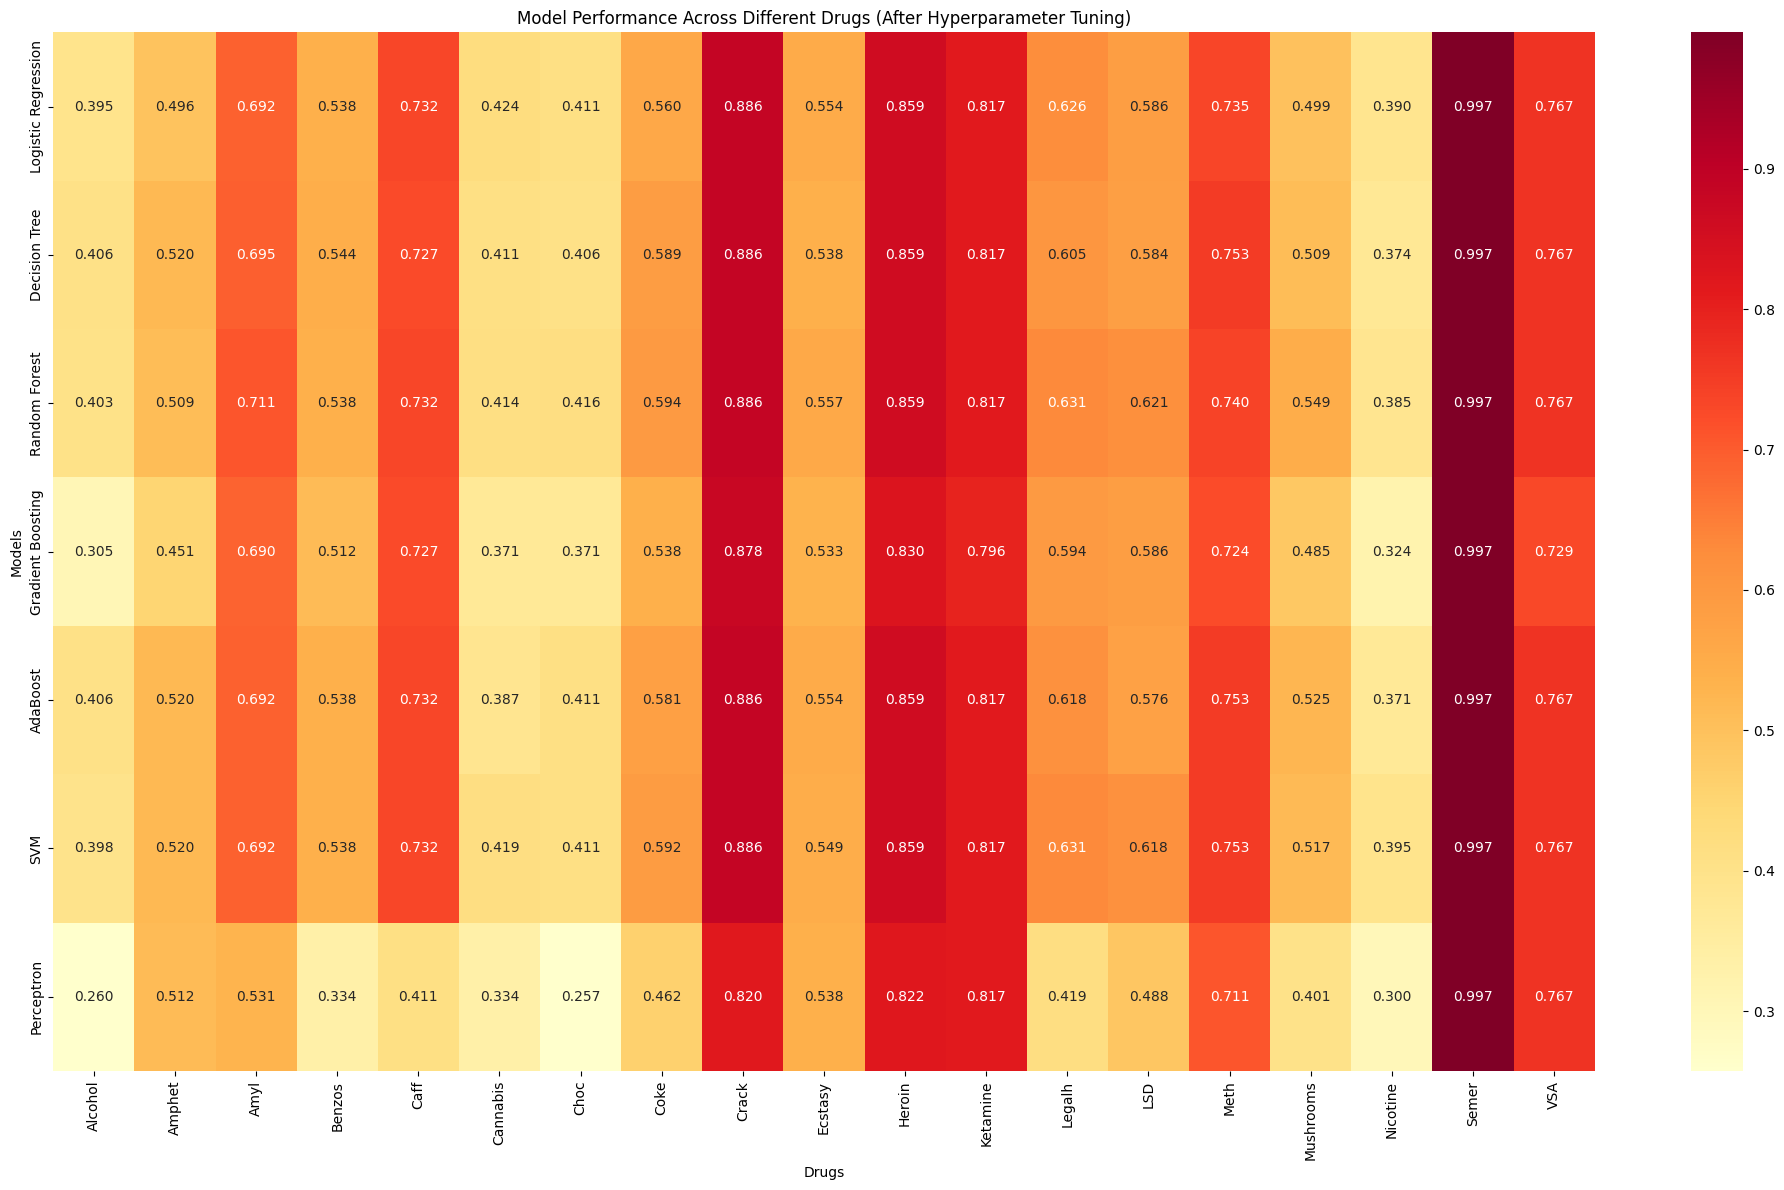

In [ ]:
all_results = {}
all_best_params = {}

X = df[feature_columns]
for drug in drug_columns:
    print(f"\n{'='*50}")
    print(f"Predicting {drug} usage")
    print('='*50)
    
    y = df[drug]
    results, best_params = train_evaluate_models(X, y, drug)
    all_results[drug] = results
    all_best_params[drug] = best_params

results_df = pd.DataFrame(all_results)



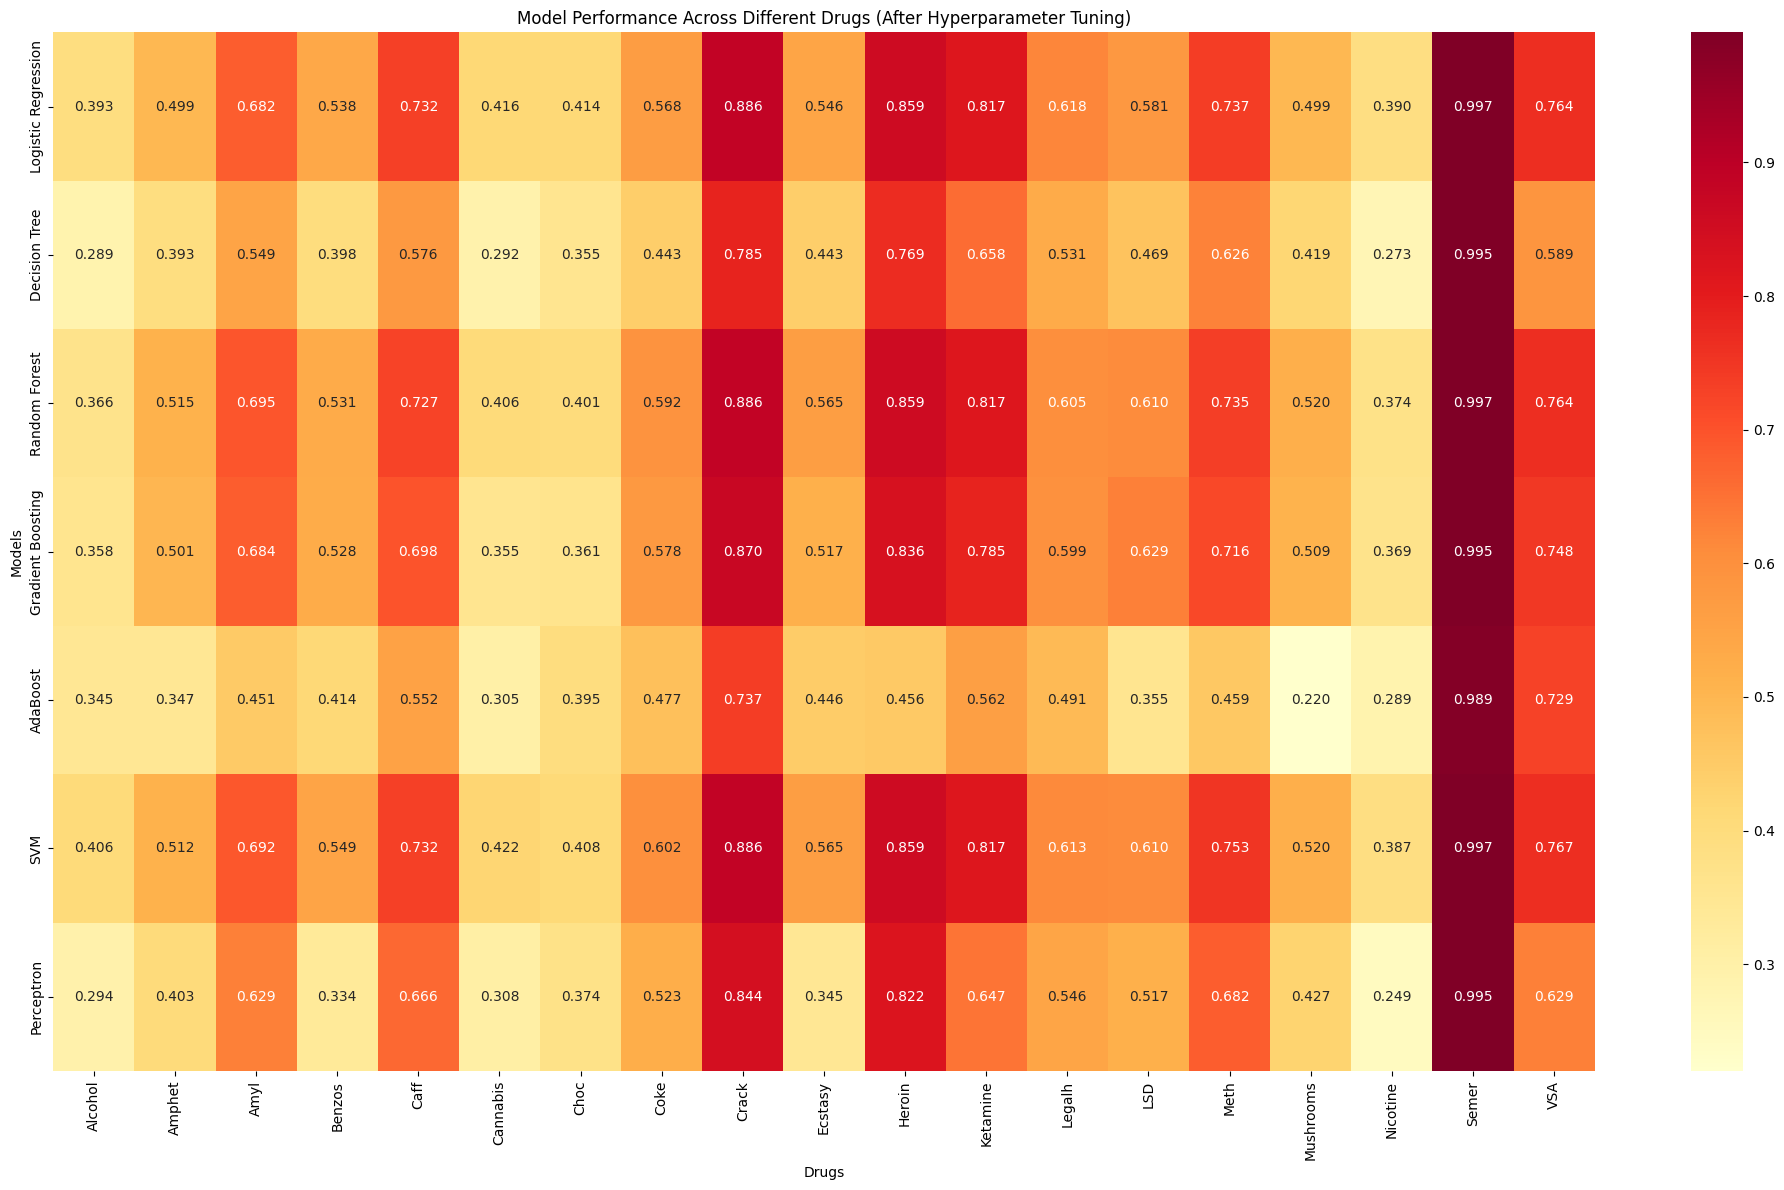

In [25]:
plt.figure(figsize=(20, 12))
sns.heatmap(results_df, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Model Performance Across Different Drugs (After Hyperparameter Tuning)')
plt.ylabel('Models')
plt.xlabel('Drugs')
plt.tight_layout()
plt.show()

In [15]:
with open('best_parameters.txt', 'w') as f:
    for drug in drug_columns:
        f.write(f"\n{drug} Best Parameters:\n")
        f.write("="*50 + "\n")
        for model, params in all_best_params[drug].items():
            f.write(f"\n{model}:\n")
            f.write(str(params))
            f.write("\n")

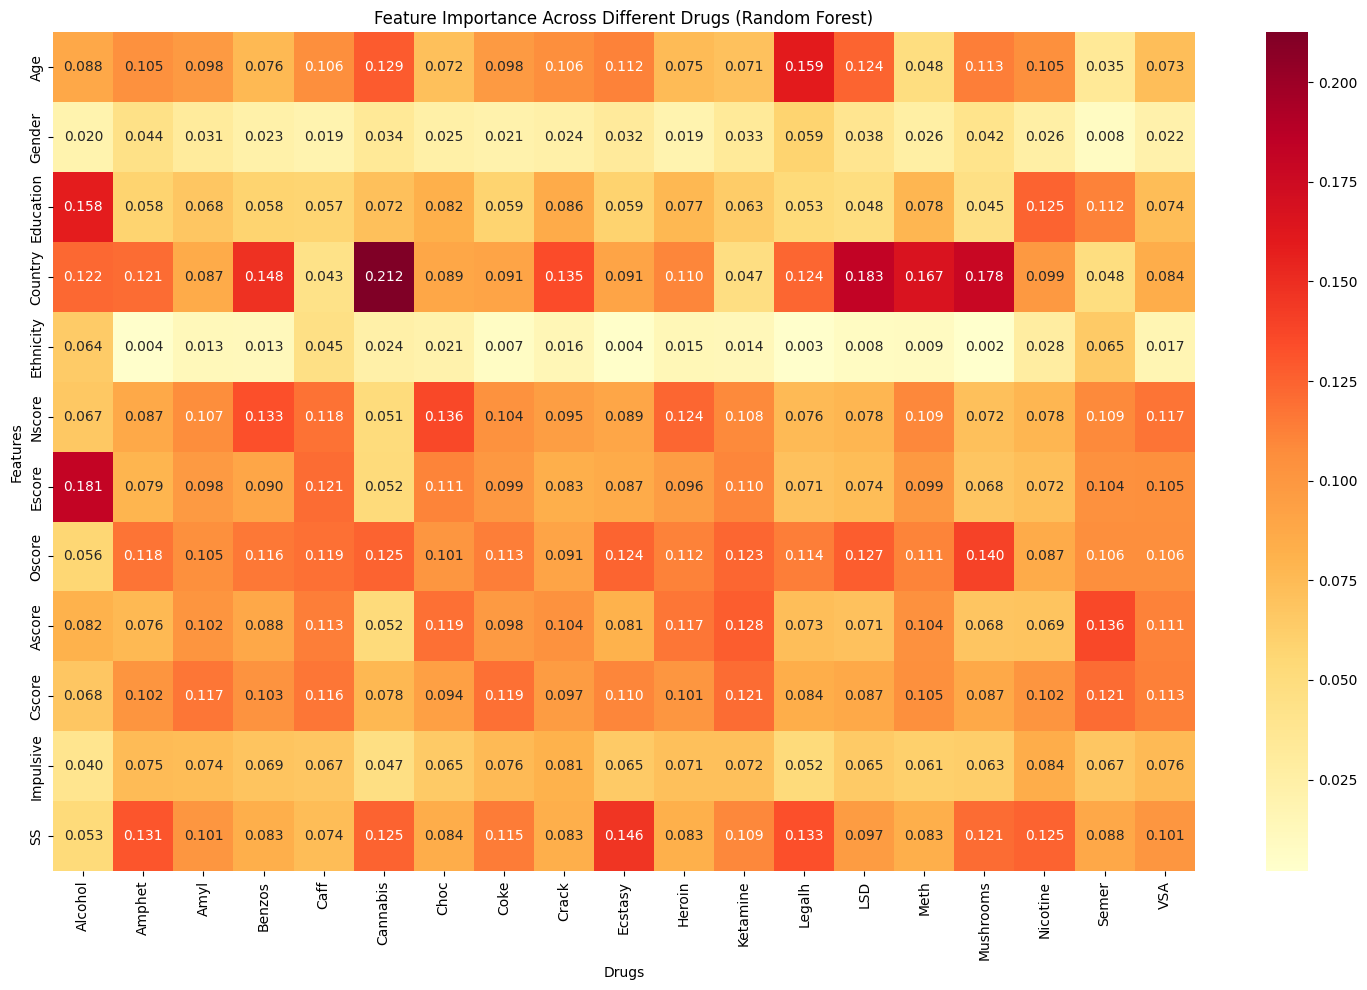

In [16]:
def plot_feature_importance():
    plt.figure(figsize=(15, 10))
    importance_data = {}
    
    for drug in drug_columns:
        # Get the best Random Forest model parameters
        best_params = all_best_params[drug]['Random Forest']
        
        # Create and train a Random Forest model with best parameters
        rf_model = RandomForestClassifier(**best_params, random_state=42)
        rf_model.fit(X, df[drug])
        
        # Store feature importance
        importance_data[drug] = rf_model.feature_importances_
    
    # Create DataFrame for feature importance
    importance_df = pd.DataFrame(importance_data, index=feature_columns)
    
    # Plot heatmap
    sns.heatmap(importance_df, annot=True, cmap='YlOrRd', fmt='.3f')
    plt.title('Feature Importance Across Different Drugs (Random Forest)')
    plt.ylabel('Features')
    plt.xlabel('Drugs')
    plt.tight_layout()
    plt.show()

# Plot feature importance
plot_feature_importance()

In [36]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(),
    'Perceptron': Perceptron()
}

# Store results
all_results = {}
all_feature_importance = {}

# Process each drug
for target_drug in drug_columns:
    print(f"\nProcessing {target_drug}...")
    
    # Get other drugs as features
    other_drugs = [drug for drug in drug_columns if drug != target_drug]
    feature_drug_columns = feature_columns + other_drugs
    
    # Prepare the data
    X = df[feature_drug_columns].copy()
    y = df[target_drug]
    
    # Label Encoding for other drugs
    le = LabelEncoder()
    for drug in other_drugs:
        X[drug] = le.fit_transform(X[drug])
    
    # Split and scale the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Store results for this drug
    drug_results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        drug_results[name] = accuracy
        
        print(f"{name} Accuracy: {accuracy:.4f}")
        
        # Store feature importance for Random Forest
        if name == 'Random Forest':
            feature_importance = pd.Series(model.feature_importances_, index=feature_drug_columns)
            all_feature_importance[target_drug] = feature_importance
    
    all_results[target_drug] = drug_results

# Convert results to DataFrame for heatmap
results_df = pd.DataFrame(all_results)



Processing Alcohol...
Logistic Regression Accuracy: 0.3979
Decision Tree Accuracy: 0.2759
Random Forest Accuracy: 0.3767
Gradient Boosting Accuracy: 0.4032
AdaBoost Accuracy: 0.3475
SVM Accuracy: 0.3979
Perceptron Accuracy: 0.2520

Processing Amphet...
Logistic Regression Accuracy: 0.5809
Decision Tree Accuracy: 0.5517
Random Forest Accuracy: 0.6393
Gradient Boosting Accuracy: 0.6313
AdaBoost Accuracy: 0.5093
SVM Accuracy: 0.6127
Perceptron Accuracy: 0.5464

Processing Amyl...
Logistic Regression Accuracy: 0.6976
Decision Tree Accuracy: 0.6472
Random Forest Accuracy: 0.7374
Gradient Boosting Accuracy: 0.7454
AdaBoost Accuracy: 0.3210
SVM Accuracy: 0.7162
Perceptron Accuracy: 0.5411

Processing Benzos...
Logistic Regression Accuracy: 0.5836
Decision Tree Accuracy: 0.4403
Random Forest Accuracy: 0.6021
Gradient Boosting Accuracy: 0.5703
AdaBoost Accuracy: 0.5225
SVM Accuracy: 0.5862
Perceptron Accuracy: 0.4881

Processing Caff...
Logistic Regression Accuracy: 0.7321
Decision Tree Accura

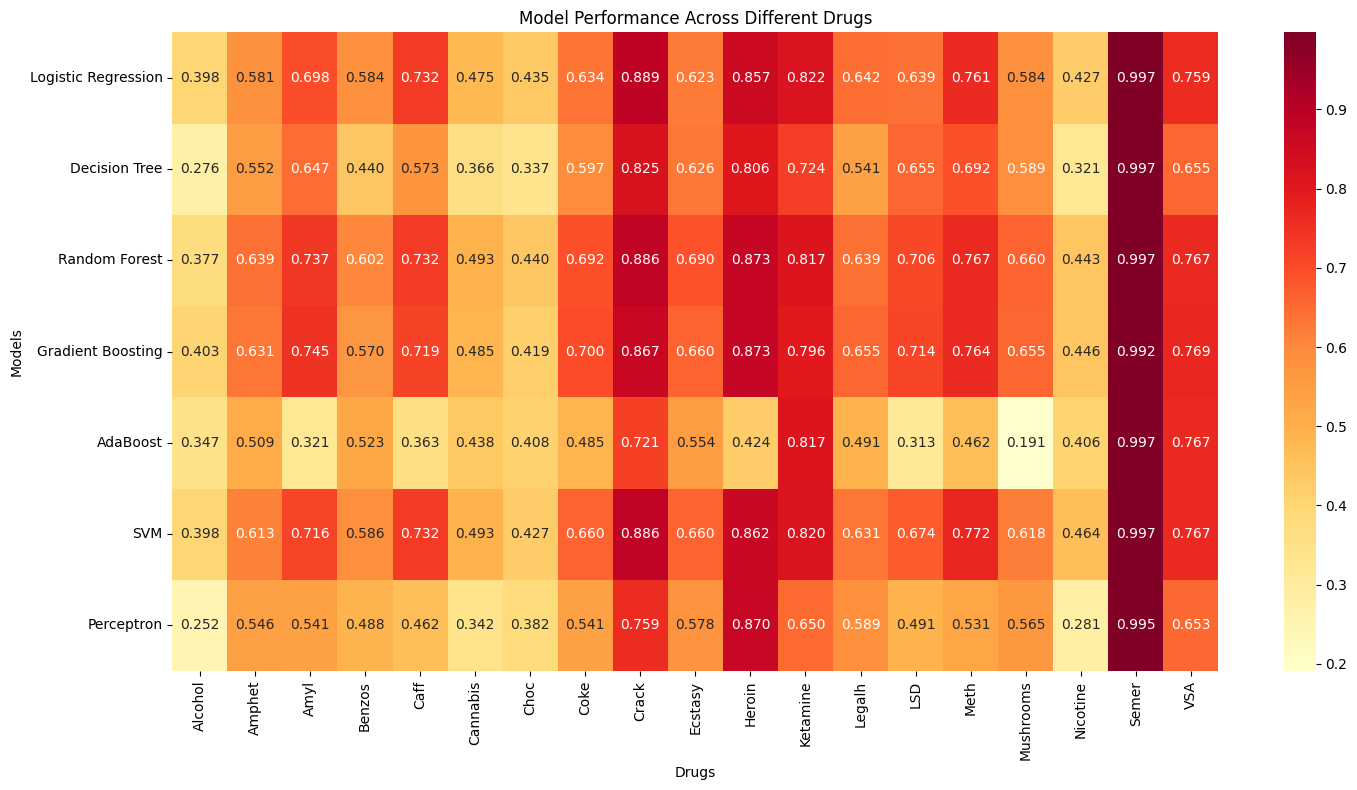


Summary Statistics

Alcohol:
Best Model: Gradient Boosting
Accuracy: 0.4032

Amphet:
Best Model: Random Forest
Accuracy: 0.6393

Amyl:
Best Model: Gradient Boosting
Accuracy: 0.7454

Benzos:
Best Model: Random Forest
Accuracy: 0.6021

Caff:
Best Model: Logistic Regression
Accuracy: 0.7321

Cannabis:
Best Model: Random Forest
Accuracy: 0.4934

Choc:
Best Model: Random Forest
Accuracy: 0.4403

Coke:
Best Model: Gradient Boosting
Accuracy: 0.7003

Crack:
Best Model: Logistic Regression
Accuracy: 0.8886

Ecstasy:
Best Model: Random Forest
Accuracy: 0.6897

Heroin:
Best Model: Random Forest
Accuracy: 0.8727

Ketamine:
Best Model: Logistic Regression
Accuracy: 0.8223

Legalh:
Best Model: Gradient Boosting
Accuracy: 0.6552

LSD:
Best Model: Gradient Boosting
Accuracy: 0.7135

Meth:
Best Model: SVM
Accuracy: 0.7719

Mushrooms:
Best Model: Random Forest
Accuracy: 0.6605

Nicotine:
Best Model: SVM
Accuracy: 0.4642

Semer:
Best Model: Logistic Regression
Accuracy: 0.9973

VSA:
Best Model: Gradie

In [38]:

# Create heatmaps
plt.figure(figsize=(15, 8))
sns.heatmap(results_df, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Model Performance Across Different Drugs')
plt.ylabel('Models')
plt.xlabel('Drugs')
plt.tight_layout()
plt.show()

# Create feature importance heatmap
importance_df = pd.DataFrame(all_feature_importance).T  # Transpose for better visualization


# Print summary statistics
print("\nSummary Statistics")
print("=" * 50)

# Best model for each drug
best_models = {}
for drug in drug_columns:
    best_model = max(all_results[drug].items(), key=lambda x: x[1])
    best_models[drug] = best_model
    print(f"\n{drug}:")
    print(f"Best Model: {best_model[0]}")
    print(f"Accuracy: {best_model[1]:.4f}")

# Overall best performing model
model_averages = results_df.mean(axis=1)
print("\nOverall Model Performance (Average across all drugs):")
for model in model_averages.index:
    print(f"{model}: {model_averages[model]:.4f}")


# Additional analysis: Most important features across all drugs
average_importance = importance_df.mean()
print("\nTop 5 Most Important Features (Average across all drugs):")
print(average_importance.sort_values(ascending=False).head())

# Calculate and display model ranking
model_ranking = results_df.mean(axis=1).sort_values(ascending=False)
print("\nModel Ranking (Average accuracy across all drugs):")
for model, score in model_ranking.items():
    print(f"{model}: {score:.4f}")
